# Metrics exercise 2: Housing prices

You are a freelance data scientist who has been hired by a large real estate agency which is interested in predicting housing values based on location. They are interested in being able to automatically predict housing prices in a region given features such as the region's population, the median income of its residents, and so forth.

In order to build a baseline model as a proof of concept, you have decided to use the California Housing Dataset which can be accessed via scikit-learn:

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

dataset = fetch_california_housing()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Part 1: Analysis

### Questions:
1. Print out the 'DESCR' field of the dataset object `dataset` to view information about the California Housing dataset. Pick one feature that you would expect to affect housing prices. Do you expect that it would be positively or negatively correlated with housing prices?
2. Calculate the Spearman correlation $\rho$ of the feature you chose in question 1 with the target variable (housing prices). Does the value of $\rho$ support your hypothesis?
3.  Split the dataset into train and test datasets `X_train, X_test, y_train, y_test` using `sklearn.model_selection.train_test_split` with 20% test data.
4. Fit a Random Forest Regressor `regr` (`sklearn.ensemble.RandomForestRegressor`) on `X_train` and `y_train`. What are the $R^2$ and RMSE values for the trained model on the train and test data sets? Hint: Use `regr.score()` and `sklearn.metrics.mean_squared_error`. Make sure to calculate RMSE and not MSE!
5. Make a scatter plot of predicted vs. actual target values (housing prices) for the train and test set. Plot the train and test sets in the same figure, in different colors.
6. How are the $R^2$ and RMSE scores on the train and test sets reflected in the scatter plot? How well can we predict housing prices in a district?

In [2]:
# 1
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

One feature that is  expected to affect housing prices is "Median Income", with a positive correlation.

In [3]:
# 2
from scipy.stats import spearmanr
rho, p_value = spearmanr(df['MedInc'], df['target'])
print(f"Spearman Correlation (𝜌): {rho}")



Spearman Correlation (𝜌): 0.6767781095942506


Spearman Correlation (𝜌) of 0.68 : moderately strong positive relationship between median income and housing prices in the California Housing dataset ; it supports my hypothesis of question 1.

In [4]:
# 3
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [5]:
# 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

y_test_pred = regr.predict(X_test)

r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))


print("R² on training set:", r2_train)
print("R² on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R² on training set: 0.9735726320302575
R² on test set: 0.8051230593157366
RMSE on training set: 0.18795619089802199
RMSE on test set: 0.5053399773665033


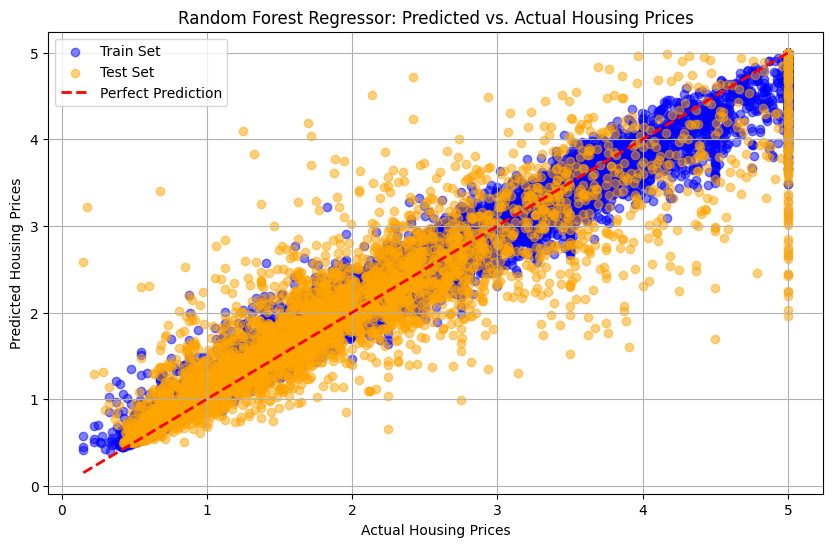

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Set', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='orange', label='Test Set', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest Regressor: Predicted vs. Actual Housing Prices')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.legend()
plt.grid(True)
plt.show()


𝑅² Scores:

    Train Set: A higher 𝑅² value on the training set indicates that the model explains a larger proportion of the variance in the training data. It measures how well the model fits the training data.
    Test Set : The 𝑅² value on the test set assesses how well the model generalizes to new, unseen data. So As expected the 𝑅² is bigger for the train set because we used this same set to train the model. We can see on the graph that the blue dots are closer to the perfect prediction line that the test set

RMSE Scores:

    Train Set : The RMSE on the training set measures the average prediction error on the training data. A lower RMSE suggests that the model's predictions are close to the actual values in the training set.
    Test Set : The RMSE on the test set assesses how well the model's predictions generalize to new data. As expected the RMSE is smaller for the training set, same reason as why 𝑅² is bigger for training set.

## Part 2: Getting Down to Business

Now that you have your regression model trained, you must prepare a report for your boss to explain your findings. Your boss is an expert in real estate but not trained in data science, and you would like to present your results in an understandable fashion.

### Questions:
7. In explaining to your boss how well your regression model works, would you prefer to show her the $R^2$ score or the $RMS$ score of the model? Justify your answer.
8. During your meeting, your boss mentions that the final model cannot include Longitude or Latitude in its input features because the dataset only includes California while the final model will be used in Oregon. Re-train your model without these two features. How would you explain to your boss how the model's results have changed, mentioning either the $R^2$ or $RMSE$ score.

7. For explaining to my boss, I would prefer 𝑅² over RMSE. 𝑅² is easy to understand, it tells how well the model explains housing price variations, with 1 being a perfect fit. In contrast, RMSE measures prediction errors in dollars, which might be less intuitive for someone not familiar with data science. 𝑅² is a commonly used and accessible metric for Analyzing model performance in regression tasks.

In [7]:
# 8
X_train.drop(['Longitude', 'Latitude'], axis=1, inplace=True)
X_test.drop(['Longitude', 'Latitude'], axis=1, inplace=True)

regr_new = RandomForestRegressor(random_state=42)
regr_new.fit(X_train, y_train)

y_train_pred = regr_new.predict(X_train)
y_test_pred = regr_new.predict(X_test)

r2_train_new = regr_new.score(X_train, y_train)
r2_test_new = regr_new.score(X_test, y_test)
rmse_train_new = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_new = sqrt(mean_squared_error(y_test, y_test_pred))

print("R² on updated training set (without Longitude and Latitude):", r2_train_new)
print("R² on updated test set (without Longitude and Latitude):", r2_test_new)
print("RMSE on updated training set (without Longitude and Latitude):", rmse_train_new)
print("RMSE on updated test set (without Longitude and Latitude):", rmse_test_new)


R² on updated training set (without Longitude and Latitude): 0.9569919978745796
R² on updated test set (without Longitude and Latitude): 0.6775265674866304
RMSE on updated training set (without Longitude and Latitude): 0.23977522844083662
RMSE on updated test set (without Longitude and Latitude): 0.6500554447196643


I would explain to my boss that removing the Longitude and Latitude features from the model training has resulted in a change in its performance. The 𝑅² score, which indicates how well the model explains the variance in housing prices, might be affected, and as we can see it's a bit lower in both the training and tests sets, same thing for the RMSE (it is bigger when dropping some features).I would explain him that this is the case because I removed some information from the dataset and that is why the model's performance has declined.